In [1]:
# 📘 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set(style="whitegrid")

In [3]:
import pandas as pd
import numpy as np

# Use lowercase 'h' (new standard)
dates = pd.date_range(start="2025-01-01", end="2025-01-31 23:00:00", freq="h")

sales_data = pd.DataFrame({
    "Date": dates,
    "Transactions": np.random.poisson(lam=10, size=len(dates)),
})

# Revenue ($)
sales_data["Total_Revenue"] = (
    sales_data["Transactions"] *
    np.random.uniform(10, 50, len(sales_data))
)

# Average Check Size
sales_data["Avg_Check"] = (
    sales_data["Total_Revenue"] /
    sales_data["Transactions"]
)

sales_data.head()

,Date,Transactions,Total_Revenue,Avg_Check
0,2025-01-01 00:00:00,13,390.866430,30.066648
1,2025-01-01 01:00:00,11,356.467191,32.406108
2,2025-01-01 02:00:00,11,167.699837,15.245440
3,2025-01-01 03:00:00,8,354.819687,44.352461
4,2025-01-01 04:00:00,18,579.224298,32.179128


In [4]:
# Menu performance: item-level revenue and food cost
menu_items = ["Poutine","Maple Bacon Burger","Caesar Salad","Smoked Salmon","Moose Stew","Vegan Tart"]
menu_data = pd.DataFrame({
    "Item": menu_items,
    "Units_Sold": np.random.randint(50, 500, len(menu_items)),
    "Price": [12.5, 15.0, 8.0, 14.0, 22.0, 9.0],
    "Food_Cost": [4.5, 5.5, 3.0, 6.0, 10.0, 3.5]
})

# Profit per item
menu_data["Profit_Per_Item"] = menu_data["Price"] - menu_data["Food_Cost"]

# Total revenue, total cost
menu_data["Total_Revenue_Item"] = menu_data["Units_Sold"] * menu_data["Price"]
menu_data["Total_Cost_Item"] = menu_data["Units_Sold"] * menu_data["Food_Cost"]

menu_data

,Item,Units_Sold,Price,Food_Cost,Profit_Per_Item,Total_Revenue_Item,Total_Cost_Item
0,Poutine,95,12.5,4.5,8.0,1187.5,427.5
1,Maple Bacon Burger,76,15.0,5.5,9.5,1140.0,418.0
2,Caesar Salad,209,8.0,3.0,5.0,1672.0,627.0
3,Smoked Salmon,478,14.0,6.0,8.0,6692.0,2868.0
4,Moose Stew,329,22.0,10.0,12.0,7238.0,3290.0
5,Vegan Tart,216,9.0,3.5,5.5,1944.0,756.0


In [5]:
# Inventory tracking
inventory_data = pd.DataFrame({
    "Item": ["Potatoes","Beef","Lettuce","Salmon","Flour","Maple Syrup"],
    "Start_Stock": [100, 50, 80, 60, 100, 30],
    "Used_Stock": [np.random.randint(20, 90) for _ in range(6)],
    "Remaining_Stock": lambda df: df["Start_Stock"] - df["Used_Stock"]
})
inventory_data["Remaining_Stock"] = inventory_data["Start_Stock"] - inventory_data["Used_Stock"]

inventory_data

,Item,Start_Stock,Used_Stock,Remaining_Stock
0,Potatoes,100,37,63
1,Beef,50,35,15
2,Lettuce,80,72,8
3,Salmon,60,31,29
4,Flour,100,25,75
5,Maple Syrup,30,61,-31


In [6]:
# Staffing records
staff_data = pd.DataFrame({
    "Employee_ID": range(1001,1011),
    "Role": ["Chef","Server","Server","Host","Dishwasher","Manager","Chef","Server","Cook","Cleaner"],
    "Hourly_Wage": [15, 10, 10, 9.5, 9.5, 20, 15, 10, 13, 8.5],
    "Hours_Worked": np.random.randint(20, 50, 10)
})

staff_data["Total_Labor_Cost"] = staff_data["Hourly_Wage"] * staff_data["Hours_Worked"]
staff_data

,Employee_ID,Role,Hourly_Wage,Hours_Worked,Total_Labor_Cost
0,1001,Chef,15.0,27,405.0
1,1002,Server,10.0,42,420.0
2,1003,Server,10.0,28,280.0
3,1004,Host,9.5,49,465.5
4,1005,Dishwasher,9.5,41,389.5
5,1006,Manager,20.0,24,480.0
6,1007,Chef,15.0,35,525.0
7,1008,Server,10.0,41,410.0
8,1009,Cook,13.0,37,481.0
9,1010,Cleaner,8.5,41,348.5


In [7]:
# Customer demographics and feedback
customer_data = pd.DataFrame({
    "Customer_ID": range(1,301),
    "Age": np.random.randint(18, 70, 300),
    "Visit_Frequency": np.random.choice(["Weekly","Monthly","First Visit"], 300),
    "Feedback_Score": np.random.randint(1, 6, 300),
    "Special_Requests": np.random.choice(["None","Vegetarian","Gluten-Free","Extra Spicy"], 300)
})

customer_data.head()

,Customer_ID,Age,Visit_Frequency,Feedback_Score,Special_Requests
0,1,53,Monthly,2,Vegetarian
1,2,69,Monthly,1,Vegetarian
2,3,61,Monthly,3,Vegetarian
3,4,58,Monthly,2,Gluten-Free
4,5,54,Monthly,2,Extra Spicy


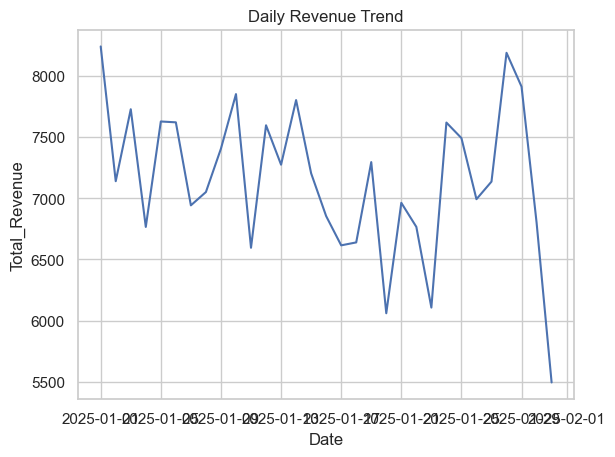

In [8]:
# Example: Daily revenue trend
daily_sales = sales_data.resample("D", on="Date")["Total_Revenue"].sum().reset_index()
sns.lineplot(data=daily_sales, x="Date", y="Total_Revenue")
plt.title("Daily Revenue Trend")
plt.show()